Assignment 2
In this assignment, you will be building a SVM classifier to label famous people's images.

Dataset
You will use the labeled faces in the Wild dataset which consists of several thousand collated photos of the various public figures.

from sklearn.datasets import fetch_lfw_people


def load_data():

    faces = fetch_lfw_people(min_faces_per_person=60)
    print('data loaded')
    print(faces.target_names)
    print(faces.images_shape)

Requirements:------------
Each image contains [62x47] or nearly 3,000 pixels. Use each pixel value as a feature. You will use RandomizedPCA to extract 150 fundamental components to feed into your SVM model as a single pipeline.


  from sklearn.svm import SVC

  from sklearn.decomposition import RandomizedPCA

  from sklearn.pipeline import make_pipeline

  pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
 
  svc = SVC(kernel='rbf', class_weight='balanced')
 
  model = make_pipeline(pca, svc)


- Split the data into a training and testing set.

- Use a grid search cross-validation to explore combinations of parameters to determine the best model:

- C: margin hardness E.g. [1, 5, 10, 50]
- gama: radial basis function kernel E.g. [0.0001, 0.0005, 0.001, 0.005]
    - precision
    - recall
    - f1-score
    - support
- Draw a 4x6 subplots of images using names as label with color black for correct instances and red for incorrect instances.
- Draw a confusion matrix between features in a heatmap with X-axis of 'Actual' and Y-axis of 'Predicted'.

https://scikit-learn.org/stable/modules/grid_search.html#grid-search



In [33]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=60)


n_samples, h, w = lfw_people.images.shape
print("No of images: %d" % n_samples)
print("Hight of image: %d" % h)
print("Width of image: %d" % w)


X = lfw_people.data
print('X shape:',X.shape)
print('X (Image Data)=\n',X)


y = lfw_people.target
print('y shape:',y.shape)
print('y (Lable Data)=\n',y)


target_names = lfw_people.target_names
print('target_names=',target_names)

No of images: 1348
Hight of image: 62
Width of image: 47
X shape: (1348, 2914)
X (Image Data)=
 [[138.         135.66667    127.666664   ...   1.6666666    1.6666666
    0.33333334]
 [ 71.333336    56.          67.666664   ... 247.66667    243.
  238.33333   ]
 [ 84.333336    97.333336    72.333336   ... 114.         194.33333
  241.        ]
 ...
 [ 29.333334    29.          29.333334   ... 145.         147.
  141.66667   ]
 [ 49.333332    55.666668    76.666664   ... 186.33333    176.33333
  161.        ]
 [ 31.          26.333334    28.         ...  34.          42.
   69.666664  ]]
y shape: (1348,)
y (Lable Data)=
 [1 3 3 ... 7 3 5]
target_names= ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.decomposition import PCA

n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)
pca.fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 1011 faces
Projecting the input data on the eigenfaces orthonormal basis


In [37]:
from sklearn.model_selection import RandomizedSearchCV

#Fitting the classifier to the training set
param_grid = {
    "C": [1, 5, 10, 50],
    "gamma":[0.0001, 0.0005, 0.001, 0.005],
}

clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10)

clf = clf.fit(X_train_pca, y_train)

#Best estimator found by grid search:")
print(clf.best_estimator_)

SVC(C=5, class_weight='balanced', gamma=0.0005)


                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.71      0.69        28
     Colin Powell       0.78      0.89      0.83        61
  Donald Rumsfeld       0.75      0.75      0.75        32
    George W Bush       0.93      0.86      0.90       124
Gerhard Schroeder       0.68      0.82      0.74        28
      Hugo Chavez       1.00      0.57      0.73        21
Junichiro Koizumi       0.92      0.86      0.89        14
       Tony Blair       0.69      0.76      0.72        29

         accuracy                           0.81       337
        macro avg       0.80      0.78      0.78       337
     weighted avg       0.83      0.81      0.81       337



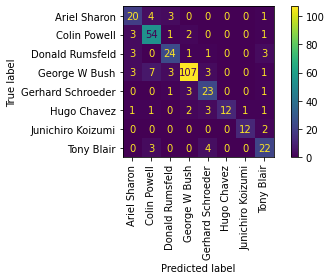

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Predicting people's names on the test set"
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

ConfusionMatrixDisplay.from_estimator(clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical")

plt.tight_layout()
plt.show()

In [39]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

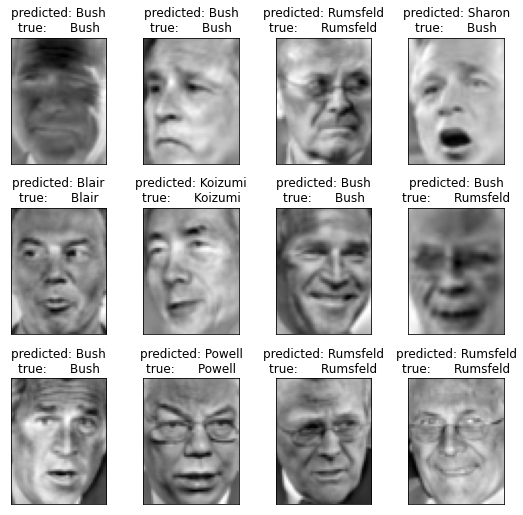

In [40]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

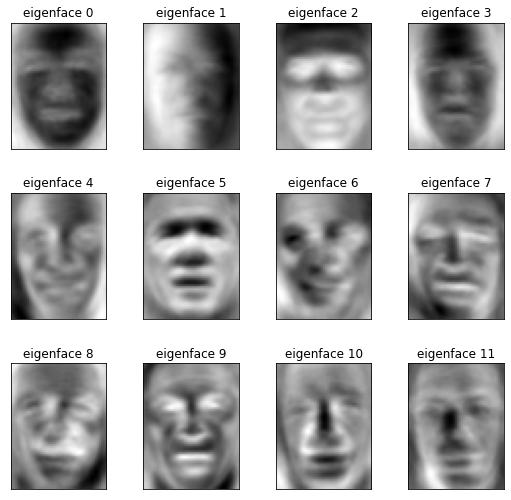

In [41]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()